# Project 4 - Part 1

In [0]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## Q1

In [0]:
NameSector <- read.csv('/Users/sydneyhung/Desktop/finance_data/Name_sector.csv')

DataDir <- '/Users/sydneyhung/Desktop/finance_data/data/'

stocks <- NameSector$Symbol
r_stocks <- c()

for (s in stocks) {
    data <- read.csv(paste0(DataDir, s, '.csv'))
    if (nrow(data) == 765){
        p <- data$Close     
        r <- numeric(0)
        for (i in 2:length(p)){
            r[i - 1] = log(p[i]) - log(p[i - 1])
        }
        r_stocks[[s]] <- r   
    }
    else {
        stocks <- stocks[-which(stocks == s)]
    }
}

In [0]:
df <- data.frame()

for (i in 1:(length(stocks)-1)){
    for (j in (i+1):length(stocks)){
        ri <- r_stocks[[i]]
        rj <- r_stocks[[j]]
        rho <- (mean(ri*rj)- mean(ri)*mean(rj)) / sqrt(( mean(ri^2)  -  mean(ri)^2) * (mean(rj^2) - mean(rj)^2)) 
        w <- sqrt(2 * (1 - rho))
        df <- rbind(df, c(i, j, rho, w))
    }
}

colnames(df) <- c("i", "j", "rho", "weight")

In [0]:
paste('Rho upper bound =', max(df$rho))
paste('Rho lower bound =', min(df$rho))

[1] "Rho upper bound = 0.98842374841357"

[1] "Rho lower bound = -0.19857335131842"

## Q2

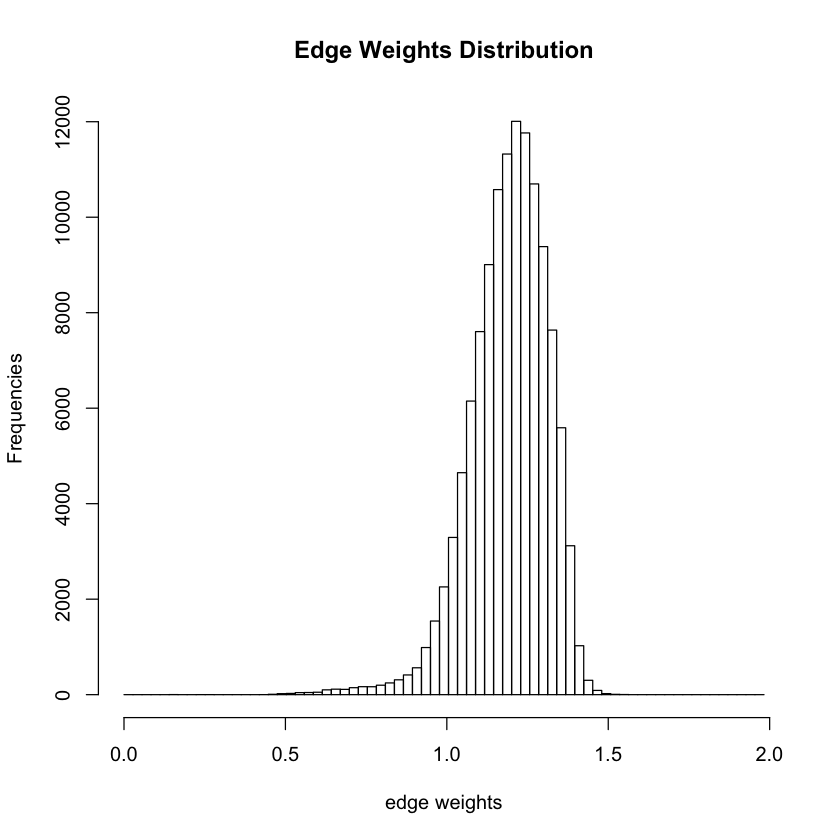

In [0]:
hist(x = df$weight, 
     breaks = seq(from = 0, to = 2, by = (max(df$weight)-min(df$weight))/50), 
     main = "Edge Weights Distribution", xlab = "edge weights", ylab = "Frequencies")

## Q3

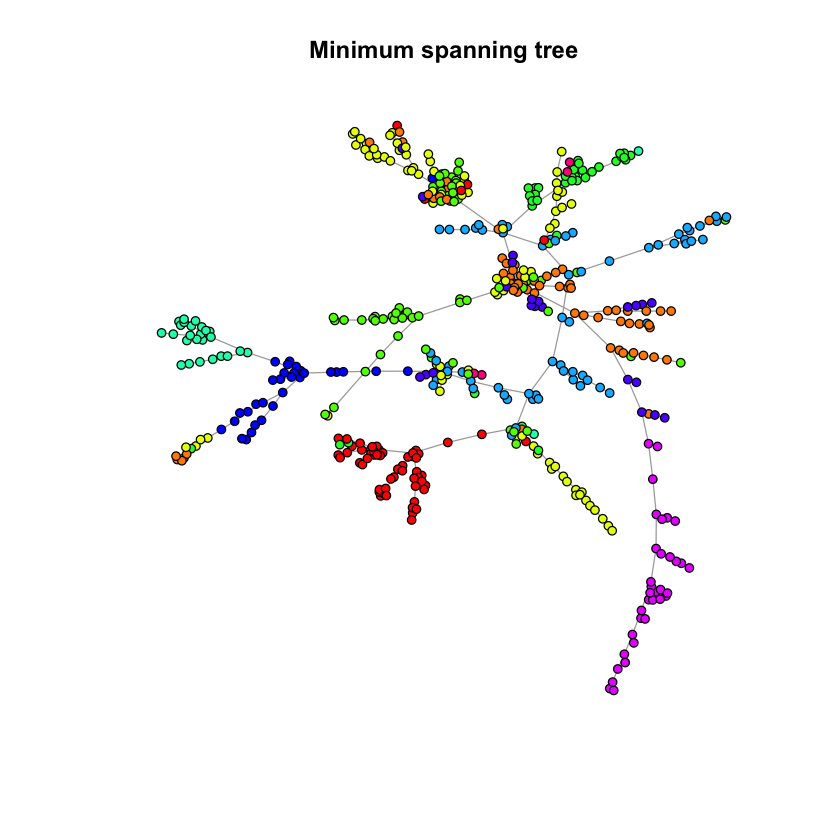

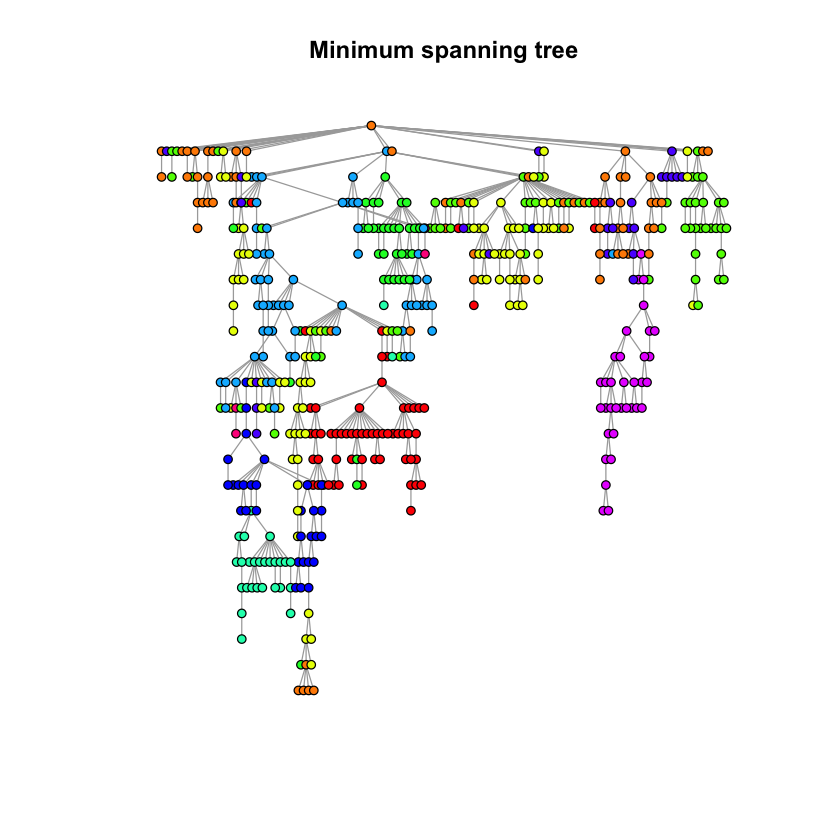

In [0]:
g <- graph_from_data_frame(df, directed=FALSE)
g.mst <- mst(g , weights = df$weight)

sectors <- unique(NameSector$Sector)
colors <- rainbow(n=length(sectors))
for (v in V(g.mst)){
    sec <- NameSector$Sector[which(stocks[v] == NameSector$Symbol)]
    V(g.mst)[v]$sector <- sec
    V(g.mst)[v]$color <- colors[which(sectors == sec)]
}

plot(g.mst, vertex.size = 3, vertex.label = NA,
     main = "Minimum spanning tree")

plot(g.mst, vertex.size = 3, vertex.label = NA, layout = layout_as_tree,
     main = "Minimum spanning tree")

## Q4

In [0]:
alpha.1 <- 0
alpha.2 <- 0

sector_size <- table(V(g.mst)$sector)

for(v in V(g.mst)) {
    neighbors <- neighbors(g.mst, v)
    sector <- V(g.mst)[v]$sector
    count <- 0
    for(n in neighbors) {
        if(sector == V(g.mst)[n]$sector) {
            count = count + 1
        }
    }
    alpha.1 <- alpha.1 + count / length(neighbors)
    alpha.2 <- alpha.2 + sector_size[sector] / length(V(g.mst))
}
alpha.1 <- alpha.1 / length(V(g.mst))
alpha.2 <- alpha.2 / length(V(g.mst))

paste('Case 1: Alpha =', alpha.1)
paste('Case 2: Alpha =', alpha.2)

[1] "Case 1: Alpha = 0.828930077530676"

[1] "Case 2: Alpha = 0.114188070612532"

## Q5

In [0]:
stocks <- NameSector$Symbol
r_stocks_weekly <- c()

for (s in stocks) {
    data <- read.csv(paste0(DataDir, s, '.csv'))
    if (nrow(data) == 765){
        idx <- which(weekdays(as.Date(data$Date,'%Y-%m-%d')) == "Monday")
        p <- data$Close[idx]
        r <- numeric(0)
        for (i in 2:length(p)){
            r[i - 1] = log(p[i]) - log(p[i - 1])
        }
        r_stocks_weekly[[s]] <- r
    }
    else {
        stocks <- stocks[-which(stocks == s)]
    }
}

In [0]:
df_weekly <- data.frame()

for (i in 1:(length(stocks)-1)){
    for (j in (i+1):length(stocks)){
        ri <- r_stocks_weekly[[i]]
        rj <- r_stocks_weekly[[j]]
        rho <- (mean(ri*rj)- mean(ri)*mean(rj)) / sqrt(( mean(ri^2)  -  mean(ri)^2) * (mean(rj^2) - mean(rj)^2)) 
        w <- sqrt(2 * (1 - rho))
        df_weekly <- rbind(df_weekly, c(i, j, w))
    }
}

colnames(df_weekly) <- c("i", "j", "weight")

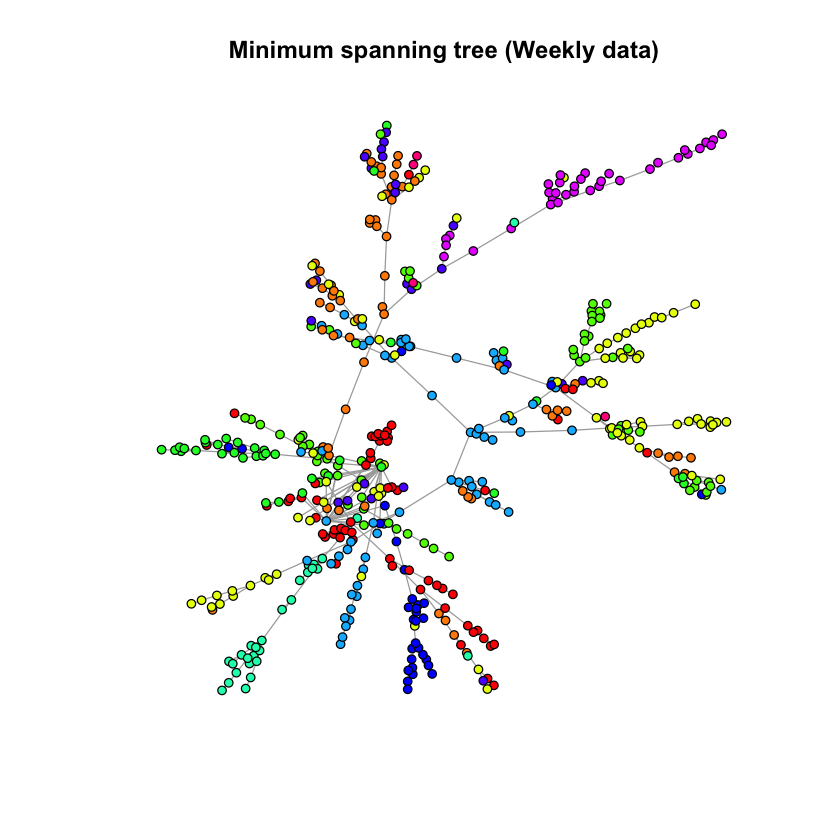

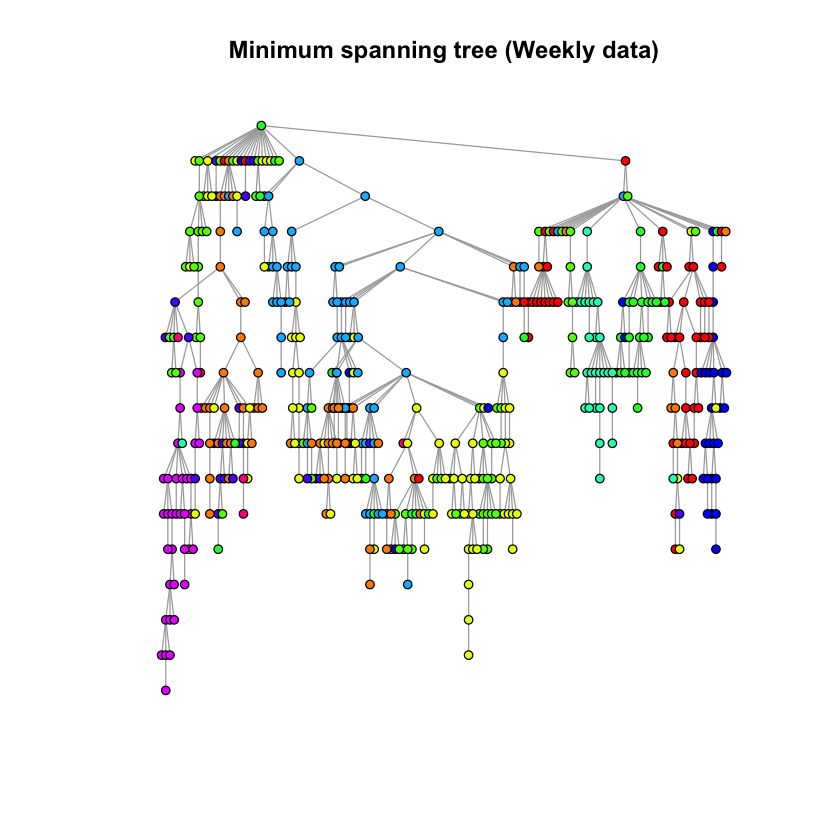

In [0]:
g <- graph_from_data_frame(df_weekly, directed=FALSE)
g.mst <- mst(g , weights = df_weekly$weight)

sectors <- unique(NameSector$Sector)
colors <- rainbow(n=length(sectors))
for (v in V(g.mst)){
    sec <- NameSector$Sector[which(stocks[v] == NameSector$Symbol)]
    V(g.mst)[v]$sector <- sec
    V(g.mst)[v]$color <- colors[which(sectors == sec)]
}

plot(g.mst, vertex.size = 3, vertex.label = NA,
     main = "Minimum spanning tree (Weekly data)")

plot(g.mst, vertex.size = 3, vertex.label = NA, layout = layout_as_tree,
     main = "Minimum spanning tree (Weekly data)")

In [0]:
alpha.1 <- 0
alpha.2 <- 0

sector_size <- table(V(g.mst)$sector)

for(v in V(g.mst)) {
    neighbors <- neighbors(g.mst, v)
    sector <- V(g.mst)[v]$sector
    count <- 0
    for(n in neighbors) {
        if(sector == V(g.mst)[n]$sector) {
            count = count + 1
        }
    }
    alpha.1 <- alpha.1 + count / length(neighbors)
    alpha.2 <- alpha.2 + sector_size[sector] / length(V(g.mst))
}
alpha.1 <- alpha.1 / length(V(g.mst))
alpha.2 <- alpha.2 / length(V(g.mst))

paste('Case 1: Alpha (Weekly data) =', alpha.1)
paste('Case 2: Alpha (Weekly data) =', alpha.2)

[1] "Case 1: Alpha (Weekly data) = 0.707317974423237"

[1] "Case 2: Alpha (Weekly data) = 0.114188070612532"